In [1]:
import csv

test_list = []

with open("testpoints_labb2.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  
    for row in reader:
        
        x, y = float(row[0]), float(row[1])
        test_list.append((x, y))

print(test_list)

[(25.0, 32.0), (24.2, 31.5), (22.0, 34.0), (20.5, 34.0)]


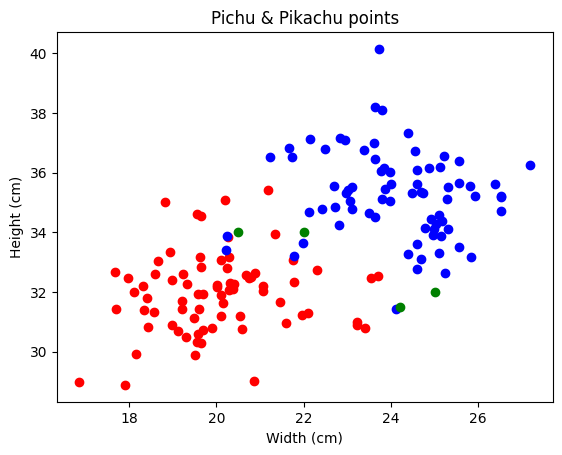

In [2]:
import matplotlib.pyplot as plt
import csv

# Create lists for "pichu" and "pikachu"
pichu_label = []
pikachu_label = []

# Categorize data into two lists (0-pichu, 1-pikachu)
with open("datapoints_labb2.txt", "r") as file:
    data = csv.reader(file, delimiter=",")
    next(data, None)
    for row in data:
        width, height, label = map(float, row)
        if label == 0:
            pichu_label.append((width, height))
        if label == 1:
            pikachu_label.append((width, height))

# Read testpoints file, skip header row and create "test_list"
test_list = []
with open("testpoints_labb2.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  
    for row in reader:
        
        x, y = float(row[0]), float(row[1])
        test_list.append((x, y))



# Create plot for every point, classified with different color for each class
plt.scatter([x[0] for x in pichu_label],[y[1] for y in pichu_label], color = 'red')
plt.scatter([x[0] for x in pikachu_label],[y[1] for y in pikachu_label], color = 'blue')
plt.scatter([x[0] for x in test_list],[y[1] for y in test_list], color = 'green')


# Define the numbers/sides meaning
plt.title("Pichu & Pikachu points")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()




In [3]:
import numpy as np 

# Calculate distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Combine list into one, calculate total number of data points
all_data = pichu_label + pikachu_label
num_test_points = len(test_list)
num_points = len(all_data)

# Create a 2D array to store distances
distances = np.zeros((num_test_points, num_points))

# Calculate and print distances between test_list and all other data points
for i in range(num_test_points):
    for j in range(num_points):
        distances[i][j] = euclidean_distance(test_list[i], all_data[j])
        print(f"The distance between point {i} and all_data point {j} is: {distances[i][j]}")

The distance between point 0 and all_data point 0 is: 3.1342624251608395
The distance between point 0 and all_data point 1 is: 7.307302403132844
The distance between point 0 and all_data point 2 is: 5.673083371066072
The distance between point 0 and all_data point 3 is: 5.704966703971587
The distance between point 0 and all_data point 4 is: 5.941049878001488
The distance between point 0 and all_data point 5 is: 6.685810462664509
The distance between point 0 and all_data point 6 is: 4.826104975673654
The distance between point 0 and all_data point 7 is: 7.747316085065725
The distance between point 0 and all_data point 8 is: 5.898200680170333
The distance between point 0 and all_data point 9 is: 4.882531262929347
The distance between point 0 and all_data point 10 is: 7.047382618425012
The distance between point 0 and all_data point 11 is: 3.564218901072862
The distance between point 0 and all_data point 12 is: 6.42589151240829
The distance between point 0 and all_data point 13 is: 5.8190

In [4]:
# Finding closest label and classify thereafter

import numpy as np

# Calculate distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Combine list into one, calculate total number of data points
all_data = pichu_label + pikachu_label
num_points = len(all_data)
num_test_points = len(test_list)

# Create 2D array to store distances
distances = np.zeros((num_test_points, num_points))

# Calculate and store distances between test_list points and all other data points
for i in range(num_test_points):
    for j in range(num_points):
        distances[i][j] = euclidean_distance(test_list[i], all_data[j])

closest_labels = []

# Classify each datapoint into either "Pichu" or "Pikachu" based on closest reference point
for i in range(num_test_points):
    closest_label = None
    min_distance = float('inf')
    for j in range(num_points):
        if distances[i][j] < min_distance:
            min_distance = distances[i][j]
            if j < len(pichu_label):
                closest_label = "Pichu"
            else:
                closest_label = "Pikachu"
    closest_labels.append(closest_label)

# Print classification results for test_list
for i in range(num_test_points):
    print(f"Sample with (width, height): {test_list[i]} classified as {closest_labels[i]}")

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


# Uppgift 1

In [5]:
# Loop until user inputs valid "values"
while True:
    try:
        # Convert input to float
        width = float(input("Enter test point width: "))
        height = float(input("Enter the height: "))
        test_point = (width, height)
        break
    # Print "invalid value" if user enters something that cannot be converted, and prompt user until valid input is provided. 
    except ValueError:
        print("Invalid value")
        
    # initialize min_distance and closest_label    
    min_distance = float('inf')
    closest_label = None
    # Set the test point coordinates based on user input
    for i in range(num_points):
        test_point = (width, height)
        # Calculate distance between test point and reference point
        distance = euclidean_distance(test_point, all_data[i])
        # If distance is smaller than current min_distance, update with new smaller distance
        if distance < min_distance:
            min_distance = distance
            # Determine closest label based on index within reference point
            if i < len(pichu_label):
                closest_label = "Pichu"
            elif i < len(pichu_label) + len(pikachu_label):
                closest_label = "Pikachu"

print(f"Test point with (width, height): {test_point} is classified as {closest_label}")

Invalid value
Invalid value
Invalid value
Invalid value
Invalid value
Invalid value
Invalid value
Invalid value
Test point with (width, height): (23.0, 34.0) is classified as Pichu


# Uppgift 2

In [9]:
import numpy as np
from operator import itemgetter

# Create list for test points
test_points = [
    (25, 32),
    (24.2, 31.5),
    (22, 34),
    (20.5, 34)
]

# Create a list to store the classifications for each test point
test_classifications = []

# Calculate distance between each test point and list of reference points
for test_point in test_points:
    distances = [(i, euclidean_distance(test_point, point)) for i, point in enumerate(all_data)]
    
    # Generate a list containing indices of the top 10 closest points, sorted in ascending order
    closest_indices = [index for index, _ in sorted(distances, key=itemgetter(1))[:10]]
    
    # Get the labels of the closest points from all_data
    closest_labels = [all_data[i] for i in closest_indices]
    
    # Perform majority voting to classify the test point as "Pichu" or "Pikachu"
    pichu_count = sum(1 for label in closest_labels if label == "Pichu")
    pikachu_count = sum(1 for label in closest_labels if label == "Pikachu")
    
    if pichu_count > pikachu_count:
        classification = "Pichu"
    else:
        classification = "Pikachu"
    
    test_classifications.append(classification)

# Print results, test points, and their classifications
for i, (test_point, classification) in enumerate(zip(test_points, test_classifications), start=1):
    print(f"Test point {i} (width, height): {test_point} = classified as {classification}")

Test point 1 (width, height): (25, 32) = classified as Pikachu
Test point 2 (width, height): (24.2, 31.5) = classified as Pikachu
Test point 3 (width, height): (22, 34) = classified as Pikachu
Test point 4 (width, height): (20.5, 34) = classified as Pikachu


Test point 1 (width, height): (25.0, 32.0) = classified as Pikachu
Test point 2 (width, height): (24.2, 31.5) = classified as Pikachu
Test point 3 (width, height): (22.0, 34.0) = classified as Pikachu
Test point 4 (width, height): (20.5, 34.0) = classified as Pichu


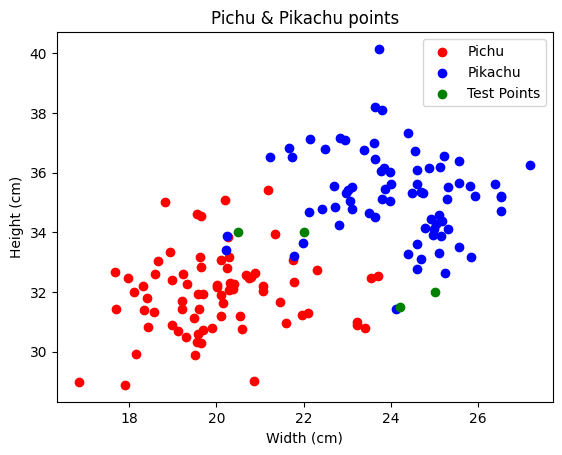

In [7]:
import numpy as np
from operator import itemgetter
import csv
import matplotlib.pyplot as plt

# Calculate distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Create lists for "pichu" and "pikachu"
pichu_label = []
pikachu_label = []

# Categorize data into two lists (0-pichu, 1-pikachu)
with open("datapoints_labb2.txt", "r") as file:
    data = csv.reader(file, delimiter=",")
    next(data, None)
    for row in data:
        width, height, label = map(float, row)
        if label == 0:
            pichu_label.append((width, height))
        if label == 1:
            pikachu_label.append((width, height))

# Read testpoints file, skip header row and create "test_list"
test_list = []
with open("testpoints_labb2.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        x, y = float(row[0]), float(row[1])
        test_list.append((x, y))

# Combine lists into one, calculate the total number of data points
all_data = pichu_label + pikachu_label
num_points = len(all_data)
num_test_points = len(test_list)

# Create 2D array to store distances
distances = np.zeros((num_test_points, num_points))

# Calculate and store distances between test_list points and all other data points
for i in range(num_test_points):
    for j in range(num_points):
        distances[i][j] = euclidean_distance(test_list[i], all_data[j])

# Create a list to store the classifications for each test point
test_classifications = []

# Classify each data point in the test_list
for i in range(num_test_points):
    closest_label = None
    min_distance = float('inf')
    for j in range(num_points):
        if distances[i][j] < min_distance:
            min_distance = distances[i][j]
            if j < len(pichu_label):
                closest_label = "Pichu"
            else:
                closest_label = "Pikachu"
    test_classifications.append(closest_label)

# Print results, test points, and their classifications
for i, (test_point, classification) in enumerate(zip(test_list, test_classifications), start=1):
    print(f"Test point {i} (width, height): {test_point} = classified as {classification}")

# Create a scatter plot of the data points
plt.scatter([x[0] for x in pichu_label], [y[1] for y in pichu_label], color='red', label='Pichu')
plt.scatter([x[0] for x in pikachu_label], [y[1] for y in pikachu_label], color='blue', label='Pikachu')
plt.scatter([x[0] for x in test_list], [y[1] for y in test_list], color='green', label='Test Points')

# Define the numbers/sides meaning
plt.title("Pichu & Pikachu points")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.show()